In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

Import the dependecies

In [68]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Bring Train Test datasets 

In [13]:
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [16]:
print(len(X_train),len(X_test))

60000 10000


In [20]:
X_train.shape

(60000, 28, 28)

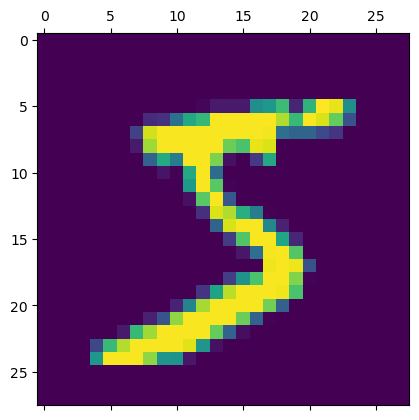

In [21]:
plt.matshow(X_train[0])

In [22]:
print(Y_train[0])

5


In [23]:
Y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [38]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train = X_train/255
X_test = X_test/255

Flatten X to get 2 dimensions

In [40]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [41]:
X_test_flattened.shape

(10000, 784)

Neural network without hidden layers

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)

In [45]:
model.fit(X_train_flattened, Y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2447 - accuracy: 0.9315
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2432 - accuracy: 0.9329
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2430 - accuracy: 0.9333
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2415 - accuracy: 0.9337
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2408 - accuracy: 0.9336


In [47]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.2676 - accuracy: 0.9280


[0.2675660252571106, 0.9279999732971191]

In [51]:
Y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 2s 6ms/step


In [52]:
Y_predicted[9]

array([3.6396350e-06, 9.2577598e-11, 1.2925202e-07, 1.7286422e-04,
       8.3831483e-01, 4.0396457e-04, 5.3175447e-10, 9.2716271e-01,
       3.1136113e-01, 9.9771184e-01], dtype=float32)

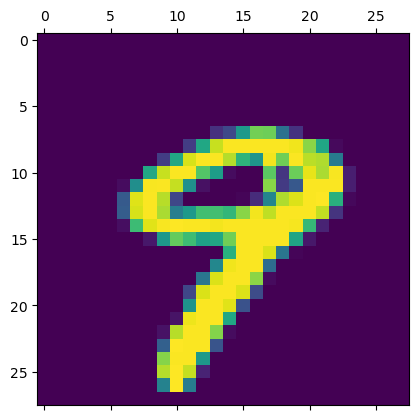

In [57]:
plt.matshow(X_test[9])

In [53]:
np.argmax(Y_predicted[9])

9

In [60]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted] 
Y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [61]:
Y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [66]:
cm = tf.math.confusion_matrix(labels = Y_test,predictions = Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    7,    9,    4,    1,    0],
       [   0, 1113,    5,    1,    0,    1,    3,    2,   10,    0],
       [   5,    8,  929,   14,    9,    3,   11,   10,   40,    3],
       [   2,    0,   19,  910,    1,   32,    2,   10,   28,    6],
       [   1,    1,    7,    2,  916,    0,    8,    4,    7,   36],
       [   8,    2,    2,   24,    9,  787,   12,    9,   34,    5],
       [  10,    3,    9,    1,    7,   15,  910,    1,    2,    0],
       [   1,    6,   23,    6,    6,    1,    0,  952,    2,   31],
       [   5,    9,    6,   16,    9,   23,    7,    9,  879,   11],
       [   9,    8,    1,    7,   19,    7,    0,   21,    8,  929]])>

Text(77.92222222222227, 0.5, 'Truth')

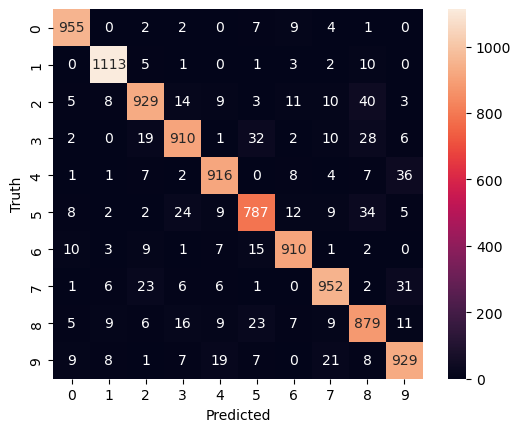

In [74]:
sns.heatmap(cm,annot =True,fmt ="d",square = "True")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer


In [77]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")

])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = "accuracy"
)
model.fit(X_train_flattened, Y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2745 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1263 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0888 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0678 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9828


In [78]:
model.evaluate(X_test_flattened,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9750


[0.08409397304058075, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step


Text(77.92222222222227, 0.5, 'Truth')

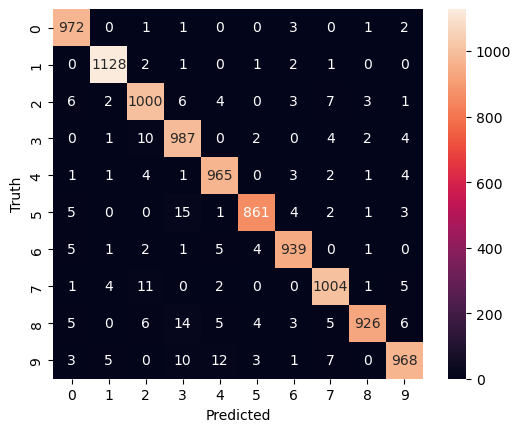

In [81]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)

sns.heatmap(cm,annot =True,fmt ="d",square = "True")
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2728 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1238 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0668 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

In [85]:
model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9785


[0.08256880193948746, 0.9785000085830688]